In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Campaign data_PS.xlsx', sheet_name='Sheet1', engine='openpyxl')

In [3]:
pivot_df = df.pivot_table(index=['Date', 'Data source', 'Campaign', 'Media Type', 'City'], columns='Metric', values='Value', aggfunc='sum').reset_index()

In [17]:
pivot_df.to_excel('Campaign_data_pivoted.xlsx', index=False, engine='openpyxl')

In [4]:
pivot_df['Date'] = pd.to_datetime(pivot_df['Date'])

In [5]:
pivot_df['Month'] = pivot_df['Date'].dt.to_period('M')

In [6]:
top_5_months = pivot_df.groupby('Month')['Impressions'].sum().nlargest(5)
top_5_months

Month
2021-09    165961540.0
2020-10    129386691.0
2021-08    110579072.0
2021-03    101885516.0
2020-02     61351689.0
Freq: M, Name: Impressions, dtype: float64

In [7]:
max_impressions_model = pivot_df.groupby('Campaign')['Impressions'].sum().idxmax()
max_impressions_model

'Armada campaign 2'

In [19]:
top_3_campaigns_per_media_type = pivot_df.groupby(['Media Type', 'Campaign'])['Impressions'].sum().reset_index()
top_3_campaigns_per_media_type = top_3_campaigns_per_media_type.groupby('Media Type').apply(lambda x: x.nlargest(3, 'Impressions')).reset_index(drop=True)
top_3_campaigns_per_media_type

C:\Users\Pritam.Saha\AppData\Local\Temp\ipykernel_14720\3556788818.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_campaigns_per_media_type = top_3_campaigns_per_media_type.groupby('Media Type').apply(lambda x: x.nlargest(3, 'Impressions')).reset_index(drop=True)


,Media Type,Campaign,Impressions
0,Display,Armada campaign 2,118817195.0
1,Display,Pathfinder campaign 1,48923126.0
2,Display,shop at home,8767120.0
3,Online Video,Pathfinder campaign 2,115286607.0
4,Online Video,Pathfinder campaign 6,51823574.0
5,Online Video,Altima campaign 3,45450707.0


In [9]:
max_impressions_campaign = pivot_df.groupby('Campaign')['Impressions'].sum().idxmax()
max_clicks_campaign = pivot_df.groupby('Campaign')['Clicks'].sum().idxmax()
max_impressions_equals_max_clicks = max_impressions_campaign == max_clicks_campaign
max_impressions_equals_max_clicks

True

In [10]:
pivot_df['CPM'] = pivot_df['Media Cost'] / pivot_df['Impressions'] * 1000
top_3_campaigns_by_cpm = pivot_df.groupby('Campaign')['CPM'].mean().nlargest(3)
top_3_campaigns_by_cpm

Campaign
Pathfinder campaign 3    17.858996
Pathfinder campaign 7    17.682058
Pathfinder campaign 5    17.661875
Name: CPM, dtype: float64

In [11]:
monthly_avg_media_cost = pivot_df.groupby(['Month', 'Media Type'])['Media Cost'].mean().unstack()
monthly_avg_media_cost

Media Type,Display,Online Video
Month,,
2019-12,0.000000,0.000000
2020-01,0.000000,0.000000
2020-02,424.566390,0.000000
2020-03,411.136057,8.695333
2020-04,0.000000,0.000000
2020-05,0.000000,NaN
2020-06,0.000000,9.997719
2020-07,0.000000,26.610211
2020-08,0.000000,80.534931


In [12]:
media_type_cpm = pivot_df.groupby('Media Type')['CPM'].mean().idxmax()
media_type_cpm

'Online Video'

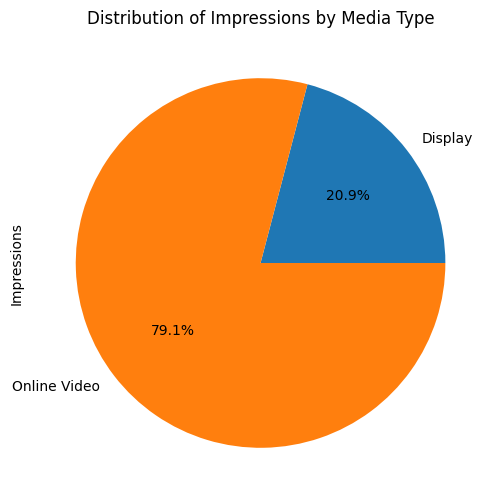

In [13]:
impressions_by_media_type = pivot_df.groupby('Media Type')['Impressions'].sum()
plt.figure(figsize=(8, 6))
impressions_by_media_type.plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Impressions by Media Type')
plt.show()

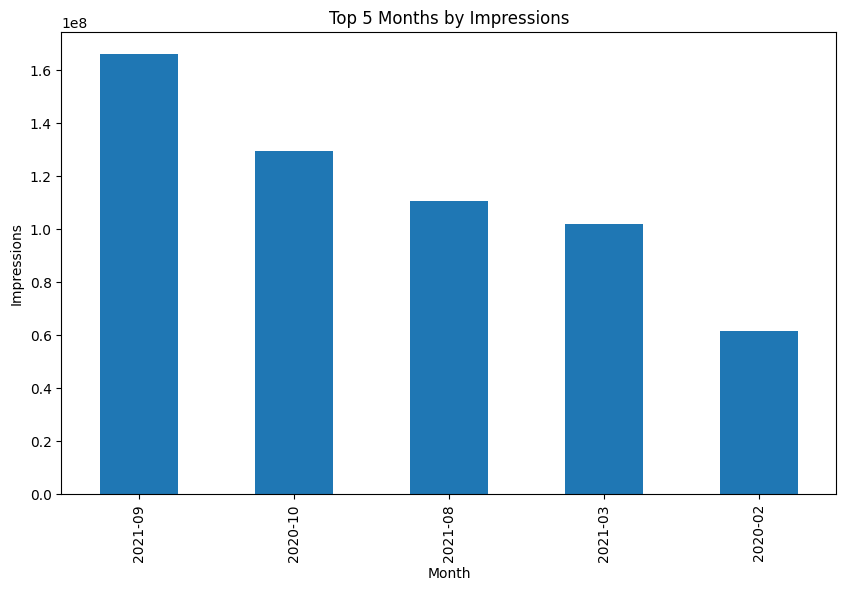

In [14]:
plt.figure(figsize=(10, 6))
top_5_months.plot(kind='bar')
plt.title('Top 5 Months by Impressions')
plt.xlabel('Month')
plt.ylabel('Impressions')
plt.show()

<Figure size 1200x800 with 0 Axes>

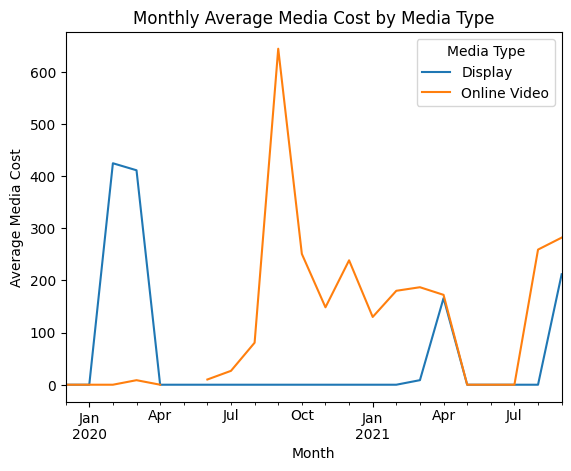

In [15]:
plt.figure(figsize=(12, 8))
monthly_avg_media_cost.plot(kind='line')
plt.title('Monthly Average Media Cost by Media Type')
plt.xlabel('Month')
plt.ylabel('Average Media Cost')
plt.show()